In [89]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Define target function

In [90]:

def target_function(x):
    return 2**x * torch.sin(2**-x)


# Data preparation

In [91]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);
# ------Dataset preparation end--------:


# Model construction

In [92]:

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        # Initial code
        # self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # self.act1 = torch.nn.Sigmoid()
        # self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

        # Ex. 3.5.7
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act4 = torch.nn.Tanh()
        self.fc5 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act5 = torch.nn.Tanh()
        self.fc6 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        # Initial code
        # x = self.fc1(x)
        # x = self.act1(x)
        # x = self.fc2(x)

        # Ex. 3.5.7
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        x = self.act5(x)
        x = self.fc6(x)
        return x


# Prediction

0.027240552008152008


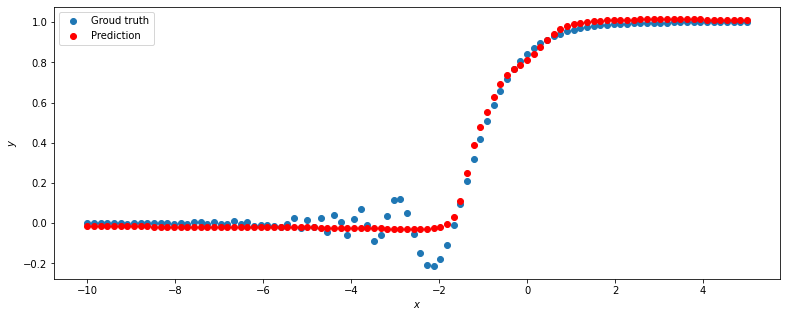

In [95]:
net = RegressionNet(100)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    # your code here (MAE)
    mae = (pred - target).abs().mean()
    return mae

for epoch_index in range(100):
    optimizer.zero_grad()
    # make forward
    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    # make backward
    loss_value.backward()
    # make step
    optimizer.step()


# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', label='Groud truth')
plt.plot(x_validation.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

# To copy for exercise

In [102]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        # self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.act3 = torch.nn.Tanh()
        # self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.act4 = torch.nn.Tanh()
        # self.fc5 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.act5 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        # x = self.fc3(x)
        # x = self.act3(x)
        # x = self.fc4(x)
        # x = self.act4(x)
        # x = self.fc5(x)
        # x = self.act5(x)
        x = self.fc3(x)
        return x


net = RegressionNet(20)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    # your code here
    mae = (pred - target).abs().mean()
    return mae

for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    # make backward
    loss_value.backward()
    # make step
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.028084293007850647
